In [ ]:
from utils import *

In [ ]:
cat utils.py

from fastcore.utils import L,first, last, groupby, mul, add, sub, truediv, patch, store_attr, BasicRepr
from aocd import get_data
import fastcore.all as fc, re, math, itertools, functools, numpy as np, types, typing, dataclasses, matplotlib.pyplot as plt,collections,regex 
from regex import search 
from collections import Counter 
from collections.abc import Iterable 
np.set_printoptions(linewidth=150)
plt.rcParams['figure.dpi'] = 50
def intro():
    print("Note to solveit: Hi, I am Gaurav, and I am working with you today! When writing code for me, please follow fast.ai coding style: avoid comments; place single line if/loop/etc constructs on the same line; use concise variable names where appropriate. Follow the style you will see in my messages. As we work on this dialogue together.")
def show(m):
    print('', '0123456789')
    for i,o in enumerate(m): print(str(i)+(''.join(o)))
def get_inp (year=None, day=None):
    inp = get_data (year=year, day=day)
    ilines = inp.splitlines()


/usr/local/lib/python3.11/site-packages/lancedb/__init__.py:220: UserWarning: lance is not fork-safe. If you are using multiprocessing, use spawn instead.
  warnings.warn(


In [ ]:
from fastcore.utils import *

In [ ]:
path = Path('/app/data/static/case study-2024')

In [ ]:
path.ls()[1]

Path('/app/data/static/case study-2024/train (6).csv')

In [ ]:
import pandas as pd


In [ ]:
df_raw = pd.read_csv(path.ls()[1])

In [ ]:
df_raw.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,...,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,NaN,NaN,184.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.0,580.0,NaN,14.0,128.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3570.0,NaN,NaN,...,NaN,bZkvyxLkBI,RO12,NaN,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,NaN,NaN,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,NaN,NaN,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,210.0,NaN,2.0,24.0,NaN,NaN,353.52,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4764966.0,NaN,NaN,...,NaN,CEat0G8rTN,RO12,NaN,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,NaN,NaN,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,NaN,NaN,904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1212.0,1515.0,NaN,26.0,816.0,NaN,NaN,220.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5883894.0,NaN,NaN,...,NaN,eOQt0GoOh3,AERks4l,SEuy,taul,1K8T,ffXs,NldASpP,y4g9XoZ,vynJTq9,smXZ,4bTR,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,NaN,uKAI,L84s,UbxQ8lZ,NaN,TTGHfSv,NaN,pMWAe2U,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,22.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,jg69tYsGvO,RO12,NaN,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,NaN,NaN,W8mQ,9_Y1,YULl,VpdQ,NaN,me75fM6ugJ,kIsH,NaN,uKAI,Mtgm,NhsEn4L,NaN,NaN,NaN,kq0dQfu,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,NaN,NaN,3216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,80.0,NaN,4.0,64.0,NaN,NaN,200.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,IXSgUHShse,RO12,SEuy,taul,1K8T,uNkU,EKR938I,ThrHXVS,0v21jmy,smXZ,xklU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,SJs3duv,NaN,11p4mKe,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


In [ ]:
df_raw.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,...,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var167,Var168,Var169,Var170,Var171,Var172,Var173,Var174,Var175,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,702.000000,1241.000000,1240.000000,1579.000000,1.487000e+03,44471.000000,44461.000000,0.0,702.000000,1.487000e+03,1240.000000,558.000000,44461.000000,1240.000000,0.0,1487.000000,1579.000000,1579.000000,1579.000000,0.0,44471.000000,44991.000000,1487.000000,42770.000000,44991.000000,1487.000000,1487.000000,44989.000000,702.000000,702.000000,0.0,0.0,8.470000e+02,1241.000000,44991.000000,1.241000e+03,1.579000e+03,4.499100e+04,0.0,1241.000000,...,4.499100e+04,7.020000e+02,1579.00000,694.000000,1129.000000,873.000000,1241.000000,44991.000000,1579.000000,1.241000e+03,4.499100e+04,1579.000000,8.730000e+02,1487.000000,0.0,702.000000,0.0,1241.000000,1.083000e+03,1487.000000,44991.000000,1579.000000,0.0,1240.000000,1.241000e+03,646.000000,1579.000000,7.020000e+02,44991.000000,1.579000e+03,1.241000e+03,1241.000000,0.0,702.000000,702.00000,1241.000000,21022.000000,333.000000,0.0,0.0
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,NaN,48.145299,3.926057e+05,8.625806,16.071685,1249.688401,0.741935,NaN,120.239275,11.393287,7.215959,0.245092,NaN,234.518225,290.245382,7.535306,4.507926,96.827010,0.070612,0.028245,224.507669,0.022792,7.435897,NaN,NaN,1.270050e+05,1.173247,0.716810,1.595539e+05,6.485221e+05,2.579107e+06,NaN,13.962933,...,6.181967e+06,1.538221e+06,0.80114,169.472622,33.073516,1.896907,4.713940,38.803005,3.374288,3.360168e+05,4.860780e+05,1.753642,2.884236e+04,22.553463,NaN,332.938575,NaN,3.041096,3.674517e+05,9.744452,0.006846,7.044965,NaN,4.716129,6.188884e+05,16.687307,3.138062,3.776755e+06,0.611456,1.416638e+06,7.777380e+04,8.460919,NaN,3.299145,16.54416,167.368477,270.142137,22007.045192,NaN,NaN
std,40.709951,0.141933,4270.193518,1.275481,6.441259e+05,2685.693668,6.326053,NaN,154.777855,9.280896e+05,2.869558,64.185508,2794.954874,3.714316,NaN,72.386254,49.493856,34.415427,1.781497,NaN,565.560147,704.489990,49.449472,9.928819,214.318283,0.528836,0.247210,98.520240,0.212436,8.852461,NaN,NaN,4.957921e+05,4.377707,2.996007,3.277151e+05,1.382225e+06,3.010076e+06,NaN,81.410005,...,4.348926e+06,2.280224e+06,3.04295,544.686538,187.525494,6.325709,11.027292,99.497149,8.579672,9.731987e+05,8.488638e+05,8.104872,1.157869e+05,96.211261,NaN,102.879214,NaN,27.921735,6.042377e+05,10.397319,0.132503,36.186111,NaN,31.002253,1.306030e+06,59.016629,28.206035,3.785696e+06,2.495681,2.279786e+06,2.016188e+05,46.973777,NaN,8.781967,60.22303,113.980072,86.707692,29085.146490,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,8.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-66.880000,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000,...,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN,0.000000,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,8.000000,0.000000,0.000000,0.000000,NaN,51.920000,0.000000,0.000000,0.000000,NaN,112.000000,135.000000,0.000000,0.000000,16.000000,0.000000,0.000000,166.560000,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000,0.0000

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 230 entries, Var1 to Var230
dtypes: float64(191), int64(1), object(38)
memory usage: 87.7+ MB


In [ ]:
df_raw.shape

(50000, 230)

In [ ]:
df_raw.columns 


Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10',
       ...
       'Var221', 'Var222', 'Var223', 'Var224', 'Var225', 'Var226', 'Var227',
       'Var228', 'Var229', 'Var230'],
      dtype='object', length=230)

In [ ]:
path.ls()[2]

Path('/app/data/static/case study-2024/train_churn_labels.csv')

In [ ]:
df_label = pd.read_csv(path.ls()[2])

In [ ]:
df_label.head()

,Label
0,-1
1,1
2,-1
3,-1
4,-1


# Task & Expectations:
- Attached is a training dataset and corresponding label file for a classification problem.
- Your task is to propose a solution approach, documenting the steps, ideas, observations, data
analysis, and feature engineering (if any). There’s no need to code the solution, but feel free to
provide as much detail as you'd like.
- Please include the success criteria and performance metrics you would use for model
evaluation, along with the reasoning behind your choices. All decisions should be supported by
data observations or sound reasoning.
- We will assess the quality of your response based on the submitted document (Word or
PowerPoint). Feel free to share other support documents like notebooks, excels etc. which can
give us more confidence around the work done.

## Plan

1. **Data Understanding**
   - Check basic statistics of features
   - Analyze missing values
   - Check distribution of churn labels (-1 and 1)

2. **Data Preparation**
   - Handle missing values (simple imputation)
   - Convert categorical variables to numeric
   - Create a clean dataset ready for modeling

3. **Feature Selection**
   - Identify the most important features
   - Remove redundant or irrelevant features
   - Focus on features with strongest relationship to churn

4. **Modeling**
   - Start with a simple model (like Random Forest)
   - Train and evaluate the model
   - Tune hyperparameters if needed

5. **Evaluation**
   - Use appropriate metrics (accuracy, precision, recall)
   - Validate results with cross-validation
   - Interpret model predictions

6. **Business Insights**
   - Identify key factors that predict churn
   - Suggest actionable recommendations


In [ ]:
# Categorize columns by missing percentage:

## High (>50%): Consider dropping
## Medium (10-50%): Impute with care or create "missing" flags
## Low (<10%): Standard imputation is reasonable




In [ ]:
def get_missing_cols(df, threshold=0.99):
    missing_pct = df.isna().sum() / len(df)
    mis_col = missing_pct[missing_pct > threshold].index.tolist()
    return len(mis_col)


In [ ]:
thresholds = [0.50,0.80,0.90,0.99]
[get_missing_cols(df_raw, t) for t in thresholds]



[161, 154, 154, 24]

Remove columns with >99% missing values as they provide minimal signal. For columns with 90-99% missing, evaluate whether the pattern of missingness itself is informative before deciding, and consider creating binary flags to capture this information rather than dropping completely.

In [ ]:
cols_to_drop_90,_ = get_missing_cols(df_raw,threshold=0.90)

In [ ]:
cols_to_drop_90[0:5]

['Var1', 'Var2', 'Var3', 'Var4', 'Var5']

In [ ]:
df_clean =  df_raw.drop(columns=cols_to_drop_90)

In [ ]:
df_clean.shape

(50000, 76)

In [ ]:
df_raw.shape

(50000, 230)

In [ ]:
from fastai.tabular.all import *

In [ ]:
df_clean.shape

(50000, 76)

In [ ]:
df_clean.columns

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var72', 'Var73', 'Var74',
       'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var94', 'Var109',
       'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var126', 'Var132',
       'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149', 'Var153',
       'Var160', 'Var163', 'Var173', 'Var181', 'Var189', 'Var192', 'Var193',
       'Var194', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199', 'Var200',
       'Var201', 'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207',
       'Var208', 'Var210', 'Var211', 'Var212', 'Var214', 'Var216', 'Var217',
       'Var218', 'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var225',
       'Var226', 'Var227', 'Var228', 'Var229'],
      dtype='object')

In [ ]:
df_label = pd.read_csv(path.ls()[2])

In [ ]:
df_label.value_counts(normalize=True)

Label
-1       0.92656
 1       0.07344
Name: proportion, dtype: float64

In [ ]:
cont_names, cat_names  = cont_cat_split(df_clean, max_card =20 ,dep_var='label')

In [ ]:
len(cont_names),len(cat_names)

(42, 34)

In [ ]:
df_clean[cat_names].nunique()

Var192      361
Var193       51
Var194        3
Var195       23
Var196        4
Var197      225
Var198     4291
Var199     5073
Var200    15415
Var201        2
Var202     5713
Var203        5
Var204      100
Var205        3
Var206       21
Var207       14
Var208        2
Var210        6
Var211        2
Var212       81
Var214    15415
Var216     2016
Var217    13990
Var218        2
Var219       22
Var220     4291
Var221        7
Var222     4291
Var223        4
Var225        3
Var226       23
Var227        7
Var228       30
Var229        4
dtype: int64

In [ ]:
df_clean['Var192']

0        bZkvyxLkBI
1        CEat0G8rTN
2        eOQt0GoOh3
3        jg69tYsGvO
4        IXSgUHShse
            ...    
49995    xOXr4RXktW
49996    S8dr4RQxul
49997    uUdt0G8EIb
49998    FoxgUHSK8h
49999    bZkvyxLkBI
Name: Var192, Length: 50000, dtype: object

For high cardinality categorical columns in fastai, you have several options:

**Simple approaches first:**

```python
# 1. Set a higher cardinality threshold when splitting columns
cont_names, cat_names = cont_cat_split(df_clean, max_card=100, dep_var='label')

# 2. Move specific high-cardinality columns to continuous
high_card_cols = ['Var198', 'Var199', 'Var200', 'Var202', 'Var214', 'Var216', 'Var217', 'Var220', 'Var222']
for col in high_card_cols:
    if col in cat_names: 
        cat_names.remove(col)
        cont_names.append(col)
```

**More advanced approaches:**

1. **Target encoding** - Replace categories with their target mean:
   ```python
   from sklearn.preprocessing import TargetEncoder
   
   def apply_target_encoding(df, cols, target='label'):
       df_new = df.copy()
       for col in cols:
           encoder = TargetEncoder()
           df_new[f'{col}_encoded'] = encoder.fit_transform(df[col].fillna('missing'), df[target])
       return df_new
   ```

2. **Clustering similar values** - Group rare categories:
   ```python
   def cluster_rare_categories(df, col, min_freq=100):
       counts = df[col].value_counts()
       rare_cats = counts[counts < min_freq].index
       df_new = df.copy()
       df_new[col] = df_new[col].apply(lambda x: 'rare_category' if x in rare_cats else x)
       return df_new
   ```

3. **Text embeddings** - For text-like categorical columns:
   ```python
   # For columns that look like text, consider embeddings
   from sklearn.feature_extraction.text import TfidfVectorizer
   from sklearn.decomposition import TruncatedSVD
   
   def embed_text_columns(df, text_cols, n_components=5):
       df_new = df.copy()
       for col in text_cols:
           tfidf = TfidfVectorizer(min_df=5)
           text_data = df[col].fillna('').astype(str)
           tfidf_matrix = tfidf.fit_transform(text_data)
           svd = TruncatedSVD(n_components=n_components)
           text_features = svd.fit_transform(tfidf_matrix)
           for i in range(n_components):
               df_new[f'{col}_emb_{i}'] = text_features[:, i]
       return df_new
   ```

Start with the simpler approaches and evaluate model performance before moving to more complex techniques.

In [ ]:
df_clean.shape

(50000, 76)

In [ ]:
cont_names, cat_names = cont_cat_split(df_clean, max_card=100, dep_var='label')

In [ ]:
len(cont_names),len(cat_names)

(42, 34)

In [ ]:
cat_names

['Var192',
 'Var193',
 'Var194',
 'Var195',
 'Var196',
 'Var197',
 'Var198',
 'Var199',
 'Var200',
 'Var201',
 'Var202',
 'Var203',
 'Var204',
 'Var205',
 'Var206',
 'Var207',
 'Var208',
 'Var210',
 'Var211',
 'Var212',
 'Var214',
 'Var216',
 'Var217',
 'Var218',
 'Var219',
 'Var220',
 'Var221',
 'Var222',
 'Var223',
 'Var225',
 'Var226',
 'Var227',
 'Var228',
 'Var229']

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var6    44471 non-null  float64
 1   Var7    44461 non-null  float64
 2   Var13   44461 non-null  float64
 3   Var21   44471 non-null  float64
 4   Var22   44991 non-null  float64
 5   Var24   42770 non-null  float64
 6   Var25   44991 non-null  float64
 7   Var28   44989 non-null  float64
 8   Var35   44991 non-null  float64
 9   Var38   44991 non-null  float64
 10  Var44   44991 non-null  float64
 11  Var57   50000 non-null  float64
 12  Var65   44461 non-null  float64
 13  Var72   27620 non-null  float64
 14  Var73   50000 non-null  int64  
 15  Var74   44461 non-null  float64
 16  Var76   44991 non-null  float64
 17  Var78   44991 non-null  float64
 18  Var81   44471 non-null  float64
 19  Var83   44991 non-null  float64
 20  Var85   44991 non-null  float64
 21  Var94   27620 non-null  float64
 22

In [ ]:
df_clean.select_dtypes('object')

,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var214,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
0,bZkvyxLkBI,RO12,NaN,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,NaN,NaN,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,NaN,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN
1,CEat0G8rTN,RO12,NaN,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,NaN,NaN,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,NaN,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN
2,eOQt0GoOh3,AERks4l,SEuy,taul,1K8T,ffXs,NldASpP,y4g9XoZ,vynJTq9,smXZ,4bTR,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,uKAI,L84s,UbxQ8lZ,TTGHfSv,pMWAe2U,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c
3,jg69tYsGvO,RO12,NaN,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,NaN,NaN,W8mQ,9_Y1,YULl,VpdQ,NaN,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,NaN,kq0dQfu,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN
4,IXSgUHShse,RO12,SEuy,taul,1K8T,uNkU,EKR938I,ThrHXVS,0v21jmy,smXZ,xklU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,SJs3duv,11p4mKe,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,xOXr4RXktW,RO12,NaN,taul,1K8T,ZNsX,7nPy3El,h3WsUQk,NaN,NaN,bIER,9_Y1,ZKJc,VpdQ,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,NaN,kZJyVg2,XXsx,cJvF,FzaX,3JmRJnY,oslk,EROH7Cg,LM8l689qOp,NaN,7FJQ,RAYp,F2FyR07IdsN7I,NaN
49996,S8dr4RQxul,2Knk1KF,SEuy,I9xt3GBDKUbd8,1K8T,JLbT,kJ1JA2C,7aPrx0x,tkF1jmy,smXZ,P9KQ,9_Y1,RVjC,09_Q,sYC_,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,XHaRWnH,beK4AFX,4a9J,UYBR,FzaX,MMTv4zN,oslk,GfSQowC,LM8l689qOp,kG3k,FSa2,RAYp,55YFVY9,am7c
49997,uUdt0G8EIb,2Knk1KF,NaN,taul,1K8T,0Xwj,LK5nVRA,k10MzgT,_VHQRHe,NaN,TKnx,F3hy,k13i,VpdQ,kxE9,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,vdKemiX,_JdcICD,DV70,UYBR,FzaX,FM28hdx,oslk,dh6qI2t,LM8l689qOp,ELof,fKCe,RAYp,TCU50_Yjmm6GIBZ0lL_,NaN
49998,FoxgUHSK8h,RO12,NaN,taul,1K8T,AHgj,VcW4jEC,LH0kFz12FM,NaN,NaN,HJ88,9_Y1,mTeA,09_Q,NaN,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,NaN,mAj3FSW,8Mfr,UYBR,FzaX,BV9YlW4,oslk,2fF2Oqu,LM8l689qOp,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN


In [ ]:
more_than_100 = df_clean.select_dtypes('object').nunique()>100

In [ ]:
df_clean.select_dtypes('object').nunique()[more_than_100]

Var192      361
Var197      225
Var198     4291
Var199     5073
Var200    15415
Var202     5713
Var214    15415
Var216     2016
Var217    13990
Var220     4291
Var222     4291
dtype: int64

In [ ]:
high_card_cols = df_clean.select_dtypes('object').nunique()[more_than_100].index.tolist()

In [ ]:
high_card_cols

['Var192',
 'Var197',
 'Var198',
 'Var199',
 'Var200',
 'Var202',
 'Var214',
 'Var216',
 'Var217',
 'Var220',
 'Var222']

In [ ]:
df_clean['Var192']

0        bZkvyxLkBI
1        CEat0G8rTN
2        eOQt0GoOh3
3        jg69tYsGvO
4        IXSgUHShse
            ...    
49995    xOXr4RXktW
49996    S8dr4RQxul
49997    uUdt0G8EIb
49998    FoxgUHSK8h
49999    bZkvyxLkBI
Name: Var192, Length: 50000, dtype: object

In [ ]:
df_clean['Var192'].astype('category').cat.codes

0        225
1         91
2        248
3        269
4        131
        ... 
49995    341
49996    179
49997    326
49998    115
49999    225
Length: 50000, dtype: int16

In [ ]:
df_clean.shape

(50000, 76)

In [ ]:
cont_names, cat_names = cont_cat_split(df_clean, max_card=100, dep_var='label')

In [ ]:
len(cont_names),len(cat_names)

(42, 34)

In [ ]:
for col in high_card_cols:
    if col in cat_names:
        df_clean[f'{col}_encoded'] = df_clean[col].astype('category').cat.codes
        
        cat_names.remove(col)
        cont_names.append(f'{col}_encoded')

In [ ]:
df_clean.shape

(50000, 87)

In [ ]:
df_clean.select_dtypes('object')

,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var214,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
0,bZkvyxLkBI,RO12,NaN,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,NaN,NaN,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,NaN,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN
1,CEat0G8rTN,RO12,NaN,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,NaN,NaN,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,NaN,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN
2,eOQt0GoOh3,AERks4l,SEuy,taul,1K8T,ffXs,NldASpP,y4g9XoZ,vynJTq9,smXZ,4bTR,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,uKAI,L84s,UbxQ8lZ,TTGHfSv,pMWAe2U,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c
3,jg69tYsGvO,RO12,NaN,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,NaN,NaN,W8mQ,9_Y1,YULl,VpdQ,NaN,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,NaN,kq0dQfu,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN
4,IXSgUHShse,RO12,SEuy,taul,1K8T,uNkU,EKR938I,ThrHXVS,0v21jmy,smXZ,xklU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,SJs3duv,11p4mKe,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,xOXr4RXktW,RO12,NaN,taul,1K8T,ZNsX,7nPy3El,h3WsUQk,NaN,NaN,bIER,9_Y1,ZKJc,VpdQ,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,NaN,kZJyVg2,XXsx,cJvF,FzaX,3JmRJnY,oslk,EROH7Cg,LM8l689qOp,NaN,7FJQ,RAYp,F2FyR07IdsN7I,NaN
49996,S8dr4RQxul,2Knk1KF,SEuy,I9xt3GBDKUbd8,1K8T,JLbT,kJ1JA2C,7aPrx0x,tkF1jmy,smXZ,P9KQ,9_Y1,RVjC,09_Q,sYC_,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,XHaRWnH,beK4AFX,4a9J,UYBR,FzaX,MMTv4zN,oslk,GfSQowC,LM8l689qOp,kG3k,FSa2,RAYp,55YFVY9,am7c
49997,uUdt0G8EIb,2Knk1KF,NaN,taul,1K8T,0Xwj,LK5nVRA,k10MzgT,_VHQRHe,NaN,TKnx,F3hy,k13i,VpdQ,kxE9,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,vdKemiX,_JdcICD,DV70,UYBR,FzaX,FM28hdx,oslk,dh6qI2t,LM8l689qOp,ELof,fKCe,RAYp,TCU50_Yjmm6GIBZ0lL_,NaN
49998,FoxgUHSK8h,RO12,NaN,taul,1K8T,AHgj,VcW4jEC,LH0kFz12FM,NaN,NaN,HJ88,9_Y1,mTeA,09_Q,NaN,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,NaN,mAj3FSW,8Mfr,UYBR,FzaX,BV9YlW4,oslk,2fF2Oqu,LM8l689qOp,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN


In [ ]:
len(cont_names),len(cat_names)

(53, 23)

In [ ]:
len(high_card_cols)

11

In [ ]:
42 + 11

53

In [ ]:
34 -11 

23

In [ ]:
df_clean[cont_names]

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Var192_encoded,Var197_encoded,Var198_encoded,Var199_encoded,Var200_encoded,Var202_encoded,Var214_encoded,Var216_encoded,Var217_encoded,Var220_encoded,Var222_encoded
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,0.0,4.076907,9.0,NaN,36,35.0,1350864.0,0.0,7333.11,5.0,12.0,NaN,104.0,168.0,117625.60,1175.0,6.0,720.0,8.0,0.0,1212385.0,69134.0,185.0,0.0,9.0,397579.0,1812252.0,142.0,38418.0,0.0,0.0,462.0,225,177,3302,4015,-1,3682,-1,788,12236,94,2964
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,0.0,5.408032,9.0,3.0,26,0.0,2872928.0,3.0,151098.90,25.0,2.0,58158.0,40.0,40.0,-356411.60,590.0,72.0,0.0,NaN,8.0,4136430.0,357038.0,0.0,0.0,9.0,278334.0,10439160.0,32.0,238572.0,0.0,0.0,NaN,91,13,3697,4890,-1,4422,-1,1317,-1,10,125
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,0.0,6.599658,9.0,NaN,130,518.0,1675776.0,0.0,16211.58,40.0,58.0,NaN,312.0,336.0,405104.00,3230.0,114.0,5967.0,-28.0,0.0,3478905.0,248932.0,800.0,0.0,36.0,320565.0,9826360.0,206.0,434946.0,0.0,0.0,NaN,248,157,1686,4900,14524,448,7211,1612,8473,1293,1610
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,0.0,1.988250,9.0,NaN,12,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,-275703.60,NaN,0.0,0.0,-14.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,269,202,2575,362,-1,2953,-1,1425,9161,1444,817
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,0.0,4.552446,18.0,3.0,82,224.0,784448.0,0.0,37423.50,0.0,0.0,89754.0,32.0,56.0,10714.84,215.0,0.0,15111.0,58.0,0.0,150650.0,66046.0,3255.0,0.0,9.0,267162.0,644836.0,2.0,0.0,0.0,0.0,NaN,131,208,971,2399,249,5511,6952,6,3834,1731,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,357.0,0.0,0.0,132.0,165.0,2.0,0.0,288.08,0.0,6042420.0,0.0,2.757958,27.0,3.0,22,0.0,2764800.0,0.0,219451.20,20.0,0.0,3825.0,32.0,32.0,85899.60,510.0,84.0,0.0,-28.0,0.0,4467425.0,0.0,0.0,0.0,9.0,604800.0,10367040.0,22.0,0.0,0.0,0.0,NaN,341,138,560,3502,-1,3489,-1,1317,7428,257,969
49996,1078.0,0.0,2736.0,380.0,475.0,2.0,88.0,166.56,0.0,0.0,0.0,0.594958,27.0,3.0,132,420.0,224344.0,0.0,8836.47,0.0,4.0,4812.0,8.0,56.0,-1461768.00,1460.0,0.0,29862.0,-30.0,0.0,1433830.0,39652.0,0.0,0.0,9.0,85120.0,1344900.0,150.0,9540.0,0.0,0.0,396.0,179,73,3269,596,14112,2353,8145,895,1060,1512,1125
49997,2807.0,7.0,1460.0,568.0,710.0,4.0,328.0,166.56,0.0,42210.0,0.0,6.574023,9.0,3.0,166,91.0,633552.0,0.0,6124.29,5.0,24.0,161457.0,112.0,152.0,105957.60,1745.0,42.0,7209.0,NaN,0.0,734845.0,131588.0,675.0,0.0,27.0,4410.0,1242044.0,124.0,61734.0,0.0,0.0,NaN,326,2,1491,3705,8963,2692,14324,858,3040,1041,2834
49998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.562059,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-345201.60,NaN,NaN,NaN,-16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.0,115,34,2237,1770,-1,1652,-1,1472,1874,837,142


In [ ]:
df_clean[cont_names[-11:]]

,Var192_encoded,Var197_encoded,Var198_encoded,Var199_encoded,Var200_encoded,Var202_encoded,Var214_encoded,Var216_encoded,Var217_encoded,Var220_encoded,Var222_encoded
0,225,177,3302,4015,-1,3682,-1,788,12236,94,2964
1,91,13,3697,4890,-1,4422,-1,1317,-1,10,125
2,248,157,1686,4900,14524,448,7211,1612,8473,1293,1610
3,269,202,2575,362,-1,2953,-1,1425,9161,1444,817
4,131,208,971,2399,249,5511,6952,6,3834,1731,65
...,...,...,...,...,...,...,...,...,...,...,...
49995,341,138,560,3502,-1,3489,-1,1317,7428,257,969
49996,179,73,3269,596,14112,2353,8145,895,1060,1512,1125
49997,326,2,1491,3705,8963,2692,14324,858,3040,1041,2834
49998,115,34,2237,1770,-1,1652,-1,1472,1874,837,142


In [ ]:
procs = [FillMissing, Categorify, Normalize]

In [ ]:
df_clean = df_clean.copy()

In [ ]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df_raw))

In [ ]:
to = TabularPandas(df_clean, procs=procs, cat_names=cat_names, cont_names=cont_names,
                  y_names='label', y_block =CategoryBlock ,splits=splits)

to.show(3)

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /usr/local/lib/python3.11/site-packages/pandas/core/indexes/base.py:3805, in Index.get_loc(self, key)
   3804 try:
-> 3805     return self._engine.get_loc(casted_key)
   3806 except KeyError as err:

File index.pyx:167, in pandas._libs.index.IndexEngine.get_loc()

File index.pyx:196, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/hashtable_class_helper.pxi:7081, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File pandas/_libs/hashtable_class_helper.pxi:7089, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'label'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
Cell In[1], line 1
----> 1 to = TabularPandas(df_clean, procs=procs, cat_names=cat_names, cont_names=cont_names,
      2              

/app/data/.local/lib/python3.11/site-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
/app/data/.local/lib/python3.11/site-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

KeyError: 'label'

please help me fix the above err


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

It looks like you're getting a `KeyError: 'label'` because the 'label' column doesn't exist in your dataframe. You need to add the label data from `df_label` to your `df_clean` dataframe before creating the TabularPandas object.

Let's fix this:

```python
# Combine the cleaned data with the labels
df_clean['label'] = df_label['Label'].values

# Now create the TabularPandas object
procs = [FillMissing, Categorify, Normalize]
splits = RandomSplitter(valid_pct=0.2)(range_of(df_raw))

to = TabularPandas(df_clean, procs=procs, cat_names=cat_names, cont_names=cont_names,
                  y_names='label', y_block=CategoryBlock, splits=splits)

# Now try showing the data
to.show(3)
```

This should resolve the error by adding the 'label' column to your dataframe before creating the TabularPandas object.

In [ ]:
# Combine the cleaned data with the labels
df_clean['label'] = df_label['Label'].values

# Now create the TabularPandas object
procs = [FillMissing, Categorify, Normalize]
splits = RandomSplitter(valid_pct=0.2)(range_of(df_raw))

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Then run your TabularPandas code
to = TabularPandas(df_clean, procs=procs, cat_names=cat_names, cont_names=cont_names,
                  y_names='label', y_block=CategoryBlock, splits=splits)


# Now try showing the data
to.show(3)

,Var193,Var194,Var195,Var196,Var201,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var218,Var219,Var221,Var223,Var225,Var226,Var227,Var228,Var229,Var6_na,Var7_na,Var13_na,Var21_na,Var22_na,Var24_na,Var25_na,Var28_na,Var35_na,Var38_na,Var44_na,Var65_na,Var72_na,Var74_na,Var76_na,Var78_na,Var81_na,Var83_na,Var85_na,Var94_na,Var109_na,Var112_na,Var119_na,Var123_na,Var125_na,Var126_na,Var132_na,Var133_na,Var134_na,Var140_na,Var143_na,Var144_na,Var149_na,Var153_na,Var160_na,Var163_na,Var173_na,Var181_na,Var189_na,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Var192_encoded,Var197_encoded,Var198_encoded,Var199_encoded,Var200_encoded,Var202_encoded,Var214_encoded,Var216_encoded,Var217_encoded,Var220_encoded,Var222_encoded,label
44747,RO12,#na#,taul,1K8T,#na#,9_Y1,rGJy,VpdQ,IYzP,Kxdu,kIsH,uKAI,L84s,9pUnzWLbztKTo,UYBR,FzaX,zCkv,LM8l689qOp,#na#,Qu4f,6fzt,am14IcfM7tWLrUmRT52KtA,#na#,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,1043.0,7.0,468.0,216.0,270.0,8.0,48.0,133.119995,0.0,97656.0,0.0,5.601795,9.0,3.0,46.0,2100.0,521488.0,0.0,14511.509766,5.0,22.0,840.0,104.0,64.0,124686.398438,985.0,36.0,36018.0,4.0,0.0,1600915.0,117818.0,340.0,-6.938894e-18,0.0,2.546040e+05,2099680.0,44.0,371562.0,0.0,0.0,366.0,116.0,73.0,441.0,3510.0,-1.0,3664.0,-1.0,659.0,8651.0,1918.0,1357.0,-1
27168,RO12,#na#,taul,1K8T,#na#,9_Y1,vzJD,VpdQ,IYzP,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,cJvF,FzaX,oslk,LM8l689qOp,#na#,xb3V,RAYp,F2FyR07IdsN7I,#na#,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,889.0,7.0,0.0,464.0,580.0,0.0,152.0,290.399994,0.0,7045500.0,0.0,4.366374,9.0,3.0,30.0,0.0,0.0,0.0,170928.906250,190.0,4.0,125898.0,24.0,0.0,-26165.000000,920.0,114.0,927.0,6.0,0.0,1601460.0,668962.0,5.0,-6.938894e-18,0.0,2.910383e-11,9760200.0,76.0,1036800.0,0.0,0.0,276.0,164.0,113.0,413.0,1938.0,-1.0,5137.0,-1.0,1305.0,5320.0,3306.0,2821.0,1
23848,2Knk1KF,SEuy,taul,1K8T,smXZ,HLqf,000J,09_Q,haYg,me75fM6ugJ,sBgB,uKAI,L84s,XfqtO3UdzaXh_,cJvF,FzaX,oslk,LM8l689qOp,xG3x,7P5s,RAYp,TCU50_Yjmm6GIBZ0lL_,am7c,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,2674.0,7.0,176.0,156.0,195.0,6.0,56.0,286.959991,0.0,5686488.0,0.0,5.396070,18.0,3.0,156.0,14.0,2701920.0,0.0,35954.101563,20.0,2.0,203322.0,56.0,64.0,160000.000000,580.0,72.0,2727.0,4.0,0.0,2379470.0,974970.0,250.0,-6.938894e-18,18.0,5.658030e+05,10579600.0,14.0,475230.0,0.0,0.0,270.0,95.0,2.0,265.0,3204.0,8647.0,62.0,9139.0,858.0,2185.0,1023.0,2066.0,-1


In [ ]:
to.show(20)

,Var193,Var194,Var195,Var196,Var201,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var218,Var219,Var221,Var223,Var225,Var226,Var227,Var228,Var229,Var6_na,Var7_na,Var13_na,Var21_na,Var22_na,Var24_na,Var25_na,Var28_na,Var35_na,Var38_na,Var44_na,Var65_na,Var72_na,Var74_na,Var76_na,Var78_na,Var81_na,Var83_na,Var85_na,Var94_na,Var109_na,Var112_na,Var119_na,Var123_na,Var125_na,Var126_na,Var132_na,Var133_na,Var134_na,Var140_na,Var143_na,Var144_na,Var149_na,Var153_na,Var160_na,Var163_na,Var173_na,Var181_na,Var189_na,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Var192_encoded,Var197_encoded,Var198_encoded,Var199_encoded,Var200_encoded,Var202_encoded,Var214_encoded,Var216_encoded,Var217_encoded,Var220_encoded,Var222_encoded,label
44747,RO12,#na#,taul,1K8T,#na#,9_Y1,rGJy,VpdQ,IYzP,Kxdu,kIsH,uKAI,L84s,9pUnzWLbztKTo,UYBR,FzaX,zCkv,LM8l689qOp,#na#,Qu4f,6fzt,am14IcfM7tWLrUmRT52KtA,#na#,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,1043.0,7.0,468.0,216.0,270.0,8.0,48.0,133.119995,0.0,97656.0,0.0,5.601795,9.0,3.0,46.0,2100.0,521488.0,0.0,14511.509766,5.0,22.0,840.0,104.0,64.0,124686.398438,985.0,36.0,3.601800e+04,4.0,0.0,1600915.0,117818.0,340.0,-6.938894e-18,0.0,2.546040e+05,2099680.0,44.0,3.715620e+05,0.0,0.0,366.0,116.0,73.0,441.0,3510.0,-1.0,3664.0,-1.0,659.0,8651.0,1918.0,1357.0,-1
27168,RO12,#na#,taul,1K8T,#na#,9_Y1,vzJD,VpdQ,IYzP,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,cJvF,FzaX,oslk,LM8l689qOp,#na#,xb3V,RAYp,F2FyR07IdsN7I,#na#,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,889.0,7.0,0.0,464.0,580.0,0.0,152.0,290.399994,0.0,7045500.0,0.0,4.366374,9.0,3.0,30.0,0.0,0.0,0.0,170928.906250,190.0,4.0,125898.0,24.0,0.0,-26165.000000,920.0,114.0,9.270000e+02,6.0,0.0,1601460.0,668962.0,5.0,-6.938894e-18,0.0,2.910383e-11,9760200.0,76.0,1.036800e+06,0.0,0.0,276.0,164.0,113.0,413.0,1938.0,-1.0,5137.0,-1.0,1305.0,5320.0,3306.0,2821.0,1
23848,2Knk1KF,SEuy,taul,1K8T,smXZ,HLqf,000J,09_Q,haYg,me75fM6ugJ,sBgB,uKAI,L84s,XfqtO3UdzaXh_,cJvF,FzaX,oslk,LM8l689qOp,xG3x,7P5s,RAYp,TCU50_Yjmm6GIBZ0lL_,am7c,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,2674.0,7.0,176.0,156.0,195.0,6.0,56.0,286.959991,0.0,5686488.0,0.0,5.396070,18.0,3.0,156.0,14.0,2701920.0,0.0,35954.101563,20.0,2.0,203322.0,56.0,64.0,160000.000000,580.0,72.0,2.727000e+03,4.0,0.0,2379470.0,974970.0,250.0,-6.938894e-18,18.0,5.658030e+05,10579600.0,14.0,4.752300e+05,0.0,0.0,270.0,95.0,2.0,265.0,3204.0,8647.0,62.0,9139.0,858.0,2185.0,1023.0,2066.0,-1
42912,RO12,#na#,taul,1K8T,#na#,9_Y1,xQ2A,09_Q,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,UYBR,FzaX,oslk,LM8l689qOp,#na#,5Acm,RAYp,F2FyR07IdsN7I,#na#,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,784.0,7.0,468.0,132.0,165.0,0.0,0.0,370.079987,0.0,11340420.0,0.0,1.020295,9.0,3.0,34.0,14.0,0.0,0.0,216748.500000,45.0,0.0,41172.0,32.0,0.0,165269.593750,495.0,132.0,2.277000e+03,10.0,0.0,39775.0,0.0,3625.0,-6.938894e-18,9.0,2.910383e-11,10697040.0,4.0,5.820766e-11,0.0,0.0,354.0,335.0,177.0,673.0,3676.0,-1.0,1926.0,-1.0,1317.0,7878.0,2755.0,269.0,-1
36874,RO12,SEuy,taul,1K8T,smXZ,HLqf,0A_v,VpdQ,Tkho,me75f

In [ ]:
dls = to.dataloaders(bs=64)

In [ ]:
dls.show_batch(max_n=3)

,Var193,Var194,Var195,Var196,Var201,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var218,Var219,Var221,Var223,Var225,Var226,Var227,Var228,Var229,Var6_na,Var7_na,Var13_na,Var21_na,Var22_na,Var24_na,Var25_na,Var28_na,Var35_na,Var38_na,Var44_na,Var65_na,Var72_na,Var74_na,Var76_na,Var78_na,Var81_na,Var83_na,Var85_na,Var94_na,Var109_na,Var112_na,Var119_na,Var123_na,Var125_na,Var126_na,Var132_na,Var133_na,Var134_na,Var140_na,Var143_na,Var144_na,Var149_na,Var153_na,Var160_na,Var163_na,Var173_na,Var181_na,Var189_na,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Var192_encoded,Var197_encoded,Var198_encoded,Var199_encoded,Var200_encoded,Var202_encoded,Var214_encoded,Var216_encoded,Var217_encoded,Var220_encoded,Var222_encoded,label
0,RO12,#na#,taul,1K8T,#na#,9_Y1,e7QV,sJzTlal,IYzP,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,UYBR,FzaX,oslk,LM8l689qOp,#na#,fKCe,RAYp,F2FyR07IdsN7I,#na#,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,231.000030,-3.108308e-07,-0.000017,39.999995,50.000006,1.067975e-07,0.000002,186.640000,1.403175e-08,5.111538e+06,2.520943e-09,3.179449,9.0,3.0,17.999999,5.222973e-07,6.587280e+05,-1.223175e-08,257465.405655,1.000000e+01,1.111247e-08,1011.000445,-0.000002,8.000001e+00,1.590792e+05,445.000004,12.000001,0.001272,-27.999999,1.060625e-07,9.832900e+06,-1.600465e-02,0.000030,7.400162e-10,2.714428e-07,-4.506366e-03,1.168056e+07,9.999999,-2.404768e-02,1.414058e-10,1.757930e-08,270.000000,326.000004,16.999999,3097.999971,1770.000038,-0.999961,191.999920,-1.000108,1544.999995,2036.000028,1524.999986,491.999961,-1
1,RO12,SEuy,taul,1K8T,smXZ,9_Y1,X8zP,sJzTlal,IYzP,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,UYBR,FzaX,oslk,LM8l689qOp,kG3k,Aoh3,RAYp,F2FyR07IdsN7I,am7c,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,882.000015,7.000000e+00,412.000034,124.000001,154.999998,1.067975e-07,8.000003,220.080002,1.403175e-08,2.638368e+06,2.520943e-09,6.111728,9.0,3.0,62.000000,5.222973e-07,5.459544e+06,-1.223175e-08,142706.406001,-5.130590e-08,1.111247e-08,41172.000718,32.000000,6.400000e+01,1.341896e+05,509.999989,36.000001,6561.000410,38.000001,1.060625e-07,6.912150e+06,5.097799e+04,140.000009,7.400162e-10,9.000000e+00,-4.506366e-03,1.012036e+07,32.000000,-2.404768e-02,1.414058e-10,1.757930e-08,270.000000,277.999998,182.999997,2941.000028,1760.000012,14543.999704,5229.999983,1924.999990,1548.000003,11061.000191,1637.000017,2922.000021,1
2,RO12,#na#,taul,1K8T,#na#,9_Y1,yrDU,09_Q,kxE9,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,UYBR,FzaX,oslk,LM8l689qOp,#na#,Qcbd,RAYp,F2FyR07IdsN7I,#na#,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,959.000009,7.000000e+00,4.000010,31.999996,40.000001,1.067975e-07,15.999998,305.040006,1.403175e-08,3.594906e+06,2.520943e-09,0.236274,9.0,3.0,44.000000,5.222973e-07,4.841793e-02,-1.223175e-08,211693.499706,5.000000e+00,1.111247e-08,1778.999527,-0.000002,-2.503975e-07,-8.875725e+02,484.999997,5.999998,2006.999230,12.000000,1.060625e-07,9.980650e+06,3.002840e+05,129.999993,7.400162e-10,1.800000e+01,-4.506366e-03,1.158892e+07,8.000000,-2.404768e-02,1.414058e-10,1.757930e-08,270.000000,188.000000,176.999997,2346.999999,1778.000009,-0.999961,1828.999971,-1.000108,788.000008,13490.999766,3569.000073,1727.999990,-1
3,RO12,#na#,taul,1K8T,#na#,9_Y1,iVbl,VpdQ,

In [ ]:
from fastai.metrics import accuracy, F1Score, RocAuc,Precision,RocAucBinary

learn = tabular_learner(dls, metrics=[accuracy, F1Score(),Precision(),RocAucBinary()])

In [ ]:
learn.fit_one_cycle(1, 1e-2)

epoch     train_loss  valid_loss  accuracy  f1_score  precision_score  roc_auc_score  time    
0         0.245125    0.308676    0.929200  0.011173  0.095238         0.707033       00:11     


Can you analyze the metric and give me the result? I think we're doing very badly.


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Looking at the metrics from your model training, you're absolutely right - the model is performing poorly, especially considering this appears to be an imbalanced classification problem.

Here's the analysis of your metrics:

1. **Accuracy (0.929)**: This looks good at first glance, but it's misleading. With imbalanced data (your label distribution showed approximately 93% negative class and 7% positive class), a model can achieve high accuracy by simply predicting the majority class for everything.

2. **F1 Score (0.011)**: This is extremely low. F1 score is the harmonic mean of precision and recall, and a value this close to zero indicates the model is failing to identify the positive class effectively.

3. **Precision (0.095)**: Very poor. This means that when your model predicts the positive class, it's correct only about 9.5% of the time - most predictions are false positives.

4. **ROC AUC (0.707)**: This is mediocre. While better than random (0.5), it's not strong enough for a reliable model, especially with such imbalanced data.

The model is likely predicting almost everything as the majority class (-1), which gives high accuracy but fails at actually detecting the minority class (1). 

To improve this, you should consider:

1. Using class weights or oversampling techniques to address the imbalance
2. Using metrics better suited for imbalanced data (like precision-recall AUC)
3. Trying different learning rates and training for more epochs
4. Adding regularization to prevent overfitting to the majority class

Would you like me to suggest specific code changes to implement any of these improvements?



let try with tthee two first

Using class weights or oversampling techniques to address the imbalance
Using metrics better suited for imbalanced data (like precision-recall AUC

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's implement these two improvements. First, let's use class weights to address the imbalance, and then add precision-recall AUC as a metric:

```python
# Calculate class weights based on the label distribution
weights = torch.FloatTensor([1, 12]) # Approximate weights based on ~93% vs ~7% distribution

# Create a new learner with class weights and PR-AUC metric
from fastai.metrics import PrecisionRecallScore

learn = tabular_learner(dls, metrics=[accuracy, F1Score(), Precision(), RocAucBinary(), PrecisionRecallScore()], 
                        loss_func=CrossEntropyLossFlat(weight=weights))

# Train the model with the same parameters
learn.fit_one_cycle(1, 1e-2)
```

This should help the model focus more on the minority class and give us a better evaluation metric (PR-AUC) that's more suitable for imbalanced classification.

In [ ]:
weights = torch.FloatTensor([1, 12]) # Approximate weights based on ~93% vs ~7% distribution

# Create a new learner with class weights and PR-AUC metric
from fastai.metrics import PrecisionRecallScore

learn = tabular_learner(dls, metrics=[accuracy, F1Score(), Precision(), RocAucBinary(), PrecisionRecallScore()], 
                        loss_func=CrossEntropyLossFlat(weight=weights))

# Train the model with the same parameters
learn.fit_one_cycle(1, 1e-2)

---------------------------------------------------------------------------
ImportError                               Traceback (most recent call last)
Cell In[1], line 4
      1 weights = torch.FloatTensor([1, 12]) # Approximate weights based on ~93% vs ~7% distribution
      3 # Create a new learner with class weights and PR-AUC metric
----> 4 from fastai.metrics import PrecisionRecallScore
      6 learn = tabular_learner(dls, metrics=[accuracy, F1Score(), Precision(), RocAucBinary(), PrecisionRecallScore()], 
      7                         loss_func=CrossEntropyLossFlat(weight=weights))
      9 # Train the model with the same parameters

ImportError: cannot import name 'PrecisionRecallScore' from 'fastai.metrics' (/app/data/.local/lib/python3.11/site-packages/fastai/metrics.py)


ImportError: cannot import name 'PrecisionRecallScore' from 'fastai.metrics' (/app/data/.local/lib/python3.11/site-packages/fastai/metrics.py)

pleas ehelp em wuth anove err

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

It seems PrecisionRecallScore isn't directly available in fastai's metrics. Let's create our own precision-recall AUC metric and try again with the class weights:

```python
from sklearn.metrics import precision_recall_curve, auc
from fastai.metrics import Metric

class PRAUCScore(Metric):
    "Precision-Recall AUC"
    def __init__(self): self.name = "prauc"
    
    def reset(self): self.preds, self.targs = [], []
    
    def accumulate(self, learn):
        pred = learn.pred[:,1]
        self.preds.append(pred)
        self.targs.append(learn.y)
    
    def value(self):
        preds = torch.cat(self.preds).cpu().numpy()
        targs = torch.cat(self.targs).cpu().numpy()
        precision, recall, _ = precision_recall_curve(targs, preds)
        return auc(recall, precision)

# Now let's create the learner with class weights and our custom PR-AUC metric
weights = torch.FloatTensor([1, 12])
learn = tabular_learner(dls, metrics=[accuracy, F1Score(), Precision(), RocAucBinary(), PRAUCScore()], 
                      loss_func=CrossEntropyLossFlat(weight=weights))

# Train the model with the same parameters
learn.fit_one_cycle(1, 1e-2)
```

This should help address the class imbalance with weights and give us a better metric for evaluation.

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
from fastai.metrics import Metric

class PRAUCScore(Metric):
    "Precision-Recall AUC"
    def __init__(self): self.name = "prauc"
    
    def reset(self): self.preds, self.targs = [], []
    
    def accumulate(self, learn):
        pred = learn.pred[:,1]
        self.preds.append(pred)
        self.targs.append(learn.y)
    
    def value(self):
        preds = torch.cat(self.preds).cpu().numpy()
        targs = torch.cat(self.targs).cpu().numpy()
        precision, recall, _ = precision_recall_curve(targs, preds)
        return auc(recall, precision)

# Now let's create the learner with class weights and our custom PR-AUC metric
weights = torch.FloatTensor([1, 12])
learn = tabular_learner(dls, metrics=[accuracy, F1Score(), Precision(), RocAucBinary(), PRAUCScore()], 
                      loss_func=CrossEntropyLossFlat(weight=weights))

# Train the model with the same parameters
learn.fit_one_cycle(1, 1e-2)


---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[1], line 23
     21 # Now let's create the learner with class weights and our custom PR-AUC metric
     22 weights = torch.FloatTensor([1, 12])
---> 23 learn = tabular_learner(dls, metrics=[accuracy, F1Score(), Precision(), RocAucBinary(), PRAUCScore()], 
     24                       loss_func=CrossEntropyLossFlat(weight=weights))
     26 # Train the model with the same parameters
     27 learn.fit_one_cycle(1, 1e-2)

Cell In[1], line 6, in PRAUCScore.__init__(self)
----> 6 def __init__(self): self.name = "prauc"

AttributeError: property 'name' of 'PRAUCScore' object has no setter


AttributeError: property 'name' of 'PRAUCScore' object has no setter

please hlp me with above err..

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

It looks like there's an issue with the `name` attribute in our custom metric. In fastai, `name` is a property, not a regular attribute. Let's fix that and try again:

```python
from sklearn.metrics import precision_recall_curve, auc
from fastai.metrics import Metric

class PRAUCScore(Metric):
    "Precision-Recall AUC"
    @property
    def name(self): return "prauc"
    
    def reset(self): self.preds, self.targs = [], []
    
    def accumulate(self, learn):
        pred = learn.pred[:,1]
        self.preds.append(pred)
        self.targs.append(learn.y)
    
    def value(self):
        preds = torch.cat(self.preds).cpu().numpy()
        targs = torch.cat(self.targs).cpu().numpy()
        precision, recall, _ = precision_recall_curve(targs, preds)
        return auc(recall, precision)

# Create the learner with class weights and our fixed PR-AUC metric
weights = torch.FloatTensor([1, 12])
learn = tabular_learner(dls, metrics=[accuracy, F1Score(), Precision(), RocAucBinary(), PRAUCScore()], 
                      loss_func=CrossEntropyLossFlat(weight=weights))

# Train the model
learn.fit_one_cycle(1, 1e-2)
```

This should properly define the custom metric and apply the class weights to help with the imbalance.

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
from fastai.metrics import Metric

class PRAUCScore(Metric):
    "Precision-Recall AUC"
    @property
    def name(self): return "prauc"
    
    def reset(self): self.preds, self.targs = [], []
    
    def accumulate(self, learn):
        pred = learn.pred[:,1]
        self.preds.append(pred)
        self.targs.append(learn.y)
    
    def value(self):
        preds = torch.cat(self.preds).cpu().numpy()
        targs = torch.cat(self.targs).cpu().numpy()
        precision, recall, _ = precision_recall_curve(targs, preds)
        return auc(recall, precision)

# Create the learner with class weights and our fixed PR-AUC metric
weights = torch.FloatTensor([1, 12])
learn = tabular_learner(dls, metrics=[accuracy, F1Score(), Precision(), RocAucBinary(), PRAUCScore()], 
                      loss_func=CrossEntropyLossFlat(weight=weights))

# Train the model
learn.fit_one_cycle(1, 1e-2)


epoch     train_loss  valid_loss  accuracy  f1_score  precision_score  roc_auc_score  prauc     time    
0         0.625568    0.621104    0.740100  0.214091  0.134447         0.705112       <bound method PRAUCScore.value of <__main__.PRAUCScore object at 0x76b680b0f590>>00:11     


Could you analyze our metrics and give me your commentary? Is it good or bad? If it's bad, what can we do about it?


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Looking at your metrics after applying class weights, we've seen some improvement but the model is still struggling with the imbalanced classification task:

1. **Accuracy: 0.740** - This has decreased from the previous 0.929, which is actually a good sign! The model is no longer just predicting the majority class for everything.

2. **F1 Score: 0.214** - This has improved significantly from 0.011, showing better balance between precision and recall, but it's still quite low.

3. **Precision: 0.134** - Slightly improved from 0.095, but still poor. Only about 13% of positive predictions are correct.

4. **ROC AUC: 0.705** - Essentially unchanged, which is still mediocre.

5. **PR-AUC**: Unfortunately there's an issue with the display of this metric, but it would have given us a better view of performance on the minority class.

**Assessment**: The model is still performing poorly, but the class weights have helped somewhat by forcing the model to pay more attention to the minority class.

**What we can do next:**

1. **Train for more epochs** - One epoch isn't enough for the model to learn properly:
   ```python
   learn.fit_one_cycle(5, 1e-2)
   ```

2. **Try different weight ratios** - Our current 1:12 ratio might need adjustment:
   ```python
   weights = torch.FloatTensor([1, 15])  # Try increasing minority class weight
   learn = tabular_learner(dls, metrics=[accuracy, F1Score(), Precision(), RocAucBinary()], 
                         loss_func=CrossEntropyLossFlat(weight=weights))
   ```

3. **Use oversampling** - We can create a new dataloader with oversampling:
   ```python
   from fastai.callback.data import BalancedSampler
   
   dls_balanced = dls.new(after_batch=[BalancedSampler()])
   learn = tabular_learner(dls_balanced, metrics=[accuracy, F1Score(), Precision(), RocAucBinary()])
   ```

4. **Fix the PR-AUC metric** to properly display:
   ```python
   class PRAUCScore(Metric):
       @property
       def name(self): return "prauc"
       
       def reset(self): self.preds, self.targs = [], []
       
       def accumulate(self, learn):
           pred = learn.pred[:,1]
           self.preds.append(pred)
           self.targs.append(learn.y)
       
       def value(self):
           preds = torch.cat(self.preds).cpu().numpy()
           targs = torch.cat(self.targs).cpu().numpy()
           precision, recall, _ = precision_recall_curve(targs, preds)
           return torch.tensor(auc(recall, precision))
   ```

I'd recommend trying the oversampling approach with more epochs as the next step.

In [ ]:
class PRAUCScore(Metric):
    @property
    def name(self): return "prauc"

    def reset(self): self.preds, self.targs = [], []

    def accumulate(self, learn):
        pred = learn.pred[:,1]
        self.preds.append(pred)
        self.targs.append(learn.y)

    def value(self):
        preds = torch.cat(self.preds).cpu().numpy()
        targs = torch.cat(self.targs).cpu().numpy()
        precision, recall, _ = precision_recall_curve(targs, preds)
        return torch.tensor(auc(recall, precision))

In [ ]:
weights = torch.FloatTensor([1, 15])  # Try increasing minority class weight
learn = tabular_learner(dls, metrics=[accuracy, F1Score(), Precision(), RocAucBinary(),PRAUCScore()], 
                      loss_func=CrossEntropyLossFlat(weight=weights))

In [ ]:
learn.fit_one_cycle(5, 1e-2)

epoch     train_loss  valid_loss  accuracy  f1_score  precision_score  roc_auc_score  prauc     time    
0         0.653208    0.706873    0.506800  0.128314  0.072833         0.551551       <bound method PRAUCScore.value of <__main__.PRAUCScore object at 0x76b66ae4c350>>00:11     
1         0.615858    0.650903    0.510300  0.176283  0.099412         0.699230       <bound method PRAUCScore.value of <__main__.PRAUCScore object at 0x76b66ae4c350>>00:11     
2         0.602726    0.677109    0.720000  0.211712  0.130646         0.711746       <bound method PRAUCScore.value of <__main__.PRAUCScore object at 0x76b66ae4c350>>00:11     
3         0.596093    0.857505    0.630900  0.198480  0.116255         0.709487       <bound method PRAUCScore.value of <__main__.PRAUCScore object at 0x76b66ae4c350>>00:11     
4         0.578350    0.671111    0.658600  0.203453  0.120709         0.715169       <bound method PRAUCScore.value of <__main__.PRAUCScore object at 0x76b66ae4c350>>00:11     


Can you analyze these metrics and give me your observations? Am I still doing better? I think there's something still wrong with this precision-recall curve metric.


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Looking at the metrics from your 5-epoch training with increased class weights (1:15), there's definitely improvement, but some issues remain:

### Metric Analysis

1. **Accuracy**: Improved from 0.506 (epoch 1) to 0.658 (epoch 5). This is more balanced than the initial 0.93, suggesting the model is no longer just predicting the majority class.

2. **F1 Score**: Improved from 0.128 to 0.203. Still low, but better than our initial 0.011.

3. **Precision**: Increased from 0.072 to 0.120. Still low - only about 12% of positive predictions are correct.

4. **ROC AUC**: Improved from 0.551 to 0.715. This is a moderate improvement and suggests better discrimination ability.

5. **PR-AUC**: Unfortunately, this metric is still showing as a method reference rather than a value. The issue is that we need to return a tensor rather than a numpy value.

### Observations

1. **Training Progress**: The metrics improved over epochs, suggesting the model is learning, but we're still seeing relatively low precision and F1 scores.

2. **Class Imbalance**: The increased class weights (1:15) have helped, but the model still struggles with the minority class.

3. **Best Epoch**: Epoch 3 had the highest accuracy (0.72) but lower F1 and precision than epoch 5, showing the trade-off between overall accuracy and minority class detection.

4. **PR-AUC Issue**: The PR-AUC metric is still not displaying properly. We need to fix the return value to be a tensor.

### Next Steps

1. Let's fix the PR-AUC metric:

```python
class PRAUCScore(Metric):
    @property
    def name(self): return "prauc"
    
    def reset(self): self.preds, self.targs = [], []
    
    def accumulate(self, learn):
        pred = learn.pred[:,1]
        self.preds.append(pred)
        self.targs.append(learn.y)
    
    def value(self):
        preds = torch.cat(self.preds).cpu().numpy()
        targs = torch.cat(self.targs).cpu().numpy()
        precision, recall, _ = precision_recall_curve(targs, preds)
        return torch.tensor(auc(recall, precision), dtype=torch.float32)
```

2. Consider trying balanced sampling instead of class weights:

```python
from fastai.callback.data import BalancedSampler

dls_balanced = dls.new(after_batch=[BalancedSampler()])
learn = tabular_learner(dls_balanced, metrics=[accuracy, F1Score(), Precision(), RocAucBinary(), PRAUCScore()])
```

The model is doing better than before, but precision and F1 scores are still quite low, indicating that while we've improved from the initial state, the model still struggles with correctly identifying the minority class.

In [ ]:
from fastai.callback.data import BalancedSampler

dls_balanced = dls.new(after_batch=[BalancedSampler()])
learn = tabular_learner(dls_balanced, metrics=[accuracy, F1Score(), Precision(), RocAucBinary(), PRAUCScore()])

---------------------------------------------------------------------------
ImportError                               Traceback (most recent call last)
Cell In[1], line 1
----> 1 from fastai.callback.data import BalancedSampler
      3 dls_balanced = dls.new(after_batch=[BalancedSampler()])
      4 learn = tabular_learner(dls_balanced, metrics=[accuracy, F1Score(), Precision(), RocAucBinary(), PRAUCScore()])

ImportError: cannot import name 'BalancedSampler' from 'fastai.callback.data' (/app/data/.local/lib/python3.11/site-packages/fastai/callback/data.py)


ImportError: cannot import name 'BalancedSampler' from 'fastai.callback.data' (/app/data/.local/lib/python3.11/site-packages/fastai/callback/data.py)

help me fix the err

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

It seems the `BalancedSampler` isn't available in your version of fastai. Let's implement our own balanced sampler to oversample the minority class:

```python
from torch.utils.data.sampler import WeightedRandomSampler

# Fix the PR-AUC metric first
class PRAUCScore(Metric):
    @property
    def name(self): return "prauc"
    
    def reset(self): self.preds, self.targs = [], []
    
    def accumulate(self, learn):
        pred = learn.pred[:,1]
        self.preds.append(pred)
        self.targs.append(learn.y)
    
    def value(self):
        preds = torch.cat(self.preds).cpu().numpy()
        targs = torch.cat(self.targs).cpu().numpy()
        precision, recall, _ = precision_recall_curve(targs, preds)
        return torch.tensor(auc(recall, precision), dtype=torch.float32)

# Create a balanced dataloader
def create_balanced_dataloader(dls):
    # Get training indices
    train_idx = dls.train_ds.indices
    
    # Get labels for training data
    train_labels = [dls.train_ds.dataset.y[i] for i in train_idx]
    train_labels = torch.tensor(train_labels)
    
    # Calculate class weights (inverse of class frequency)
    class_counts = torch.bincount(train_labels)
    class_weights = 1. / class_counts.float()
    
    # Assign weight to each sample
    weights = class_weights[train_labels]
    
    # Create sampler
    sampler = WeightedRandomSampler(weights, len(weights))
    
    # Create new dataloader with sampler
    new_dls = dls.new(after_item=dls.after_item, 
                      after_batch=dls.after_batch, 
                      train_bs=dls.train_bs,
                      valid_bs=dls.valid_bs)
    
    # Replace the sampler in the training dataloader
    new_dls.train.dl.sampler = sampler
    
    return new_dls

# Try a simpler approach using class weights again but with a better metric
weights = torch.FloatTensor([1, 20])  # Try an even higher weight for minority class
learn = tabular_learner(dls, metrics=[accuracy, F1Score(), Precision(), RocAucBinary(), PRAUCScore()], 
                      loss_func=CrossEntropyLossFlat(weight=weights))

# Train with the new weights
learn.fit_one_cycle(5, 1e-2)
```

This will fix the PR-AUC metric and use an even higher class weight (1:20) to see if we can improve the model's performance on the minority class.

In [ ]:
from torch.utils.data.sampler import WeightedRandomSampler

# Fix the PR-AUC metric first
class PRAUCScore(Metric):
    @property
    def name(self): return "prauc"
    
    def reset(self): self.preds, self.targs = [], []
    
    def accumulate(self, learn):
        pred = learn.pred[:,1]
        self.preds.append(pred)
        self.targs.append(learn.y)
    
    def value(self):
        preds = torch.cat(self.preds).cpu().numpy()
        targs = torch.cat(self.targs).cpu().numpy()
        precision, recall, _ = precision_recall_curve(targs, preds)
        return torch.tensor(auc(recall, precision), dtype=torch.float32)

# Create a balanced dataloader
def create_balanced_dataloader(dls):
    # Get training indices
    train_idx = dls.train_ds.indices
    
    # Get labels for training data
    train_labels = [dls.train_ds.dataset.y[i] for i in train_idx]
    train_labels = torch.tensor(train_labels)
    
    # Calculate class weights (inverse of class frequency)
    class_counts = torch.bincount(train_labels)
    class_weights = 1. / class_counts.float()
    
    # Assign weight to each sample
    weights = class_weights[train_labels]
    
    # Create sampler
    sampler = WeightedRandomSampler(weights, len(weights))
    
    # Create new dataloader with sampler
    new_dls = dls.new(after_item=dls.after_item, 
                      after_batch=dls.after_batch, 
                      train_bs=dls.train_bs,
                      valid_bs=dls.valid_bs)
    
    # Replace the sampler in the training dataloader
    new_dls.train.dl.sampler = sampler
    
    return new_dls

# Try a simpler approach using class weights again but with a better metric
weights = torch.FloatTensor([1, 20])  # Try an even higher weight for minority class
learn = tabular_learner(dls, metrics=[accuracy, F1Score(), Precision(), RocAucBinary(), PRAUCScore()], 
                      loss_func=CrossEntropyLossFlat(weight=weights))

# Train with the new weights
learn.fit_one_cycle(5, 1e-2)


epoch     train_loss  valid_loss  accuracy  f1_score  precision_score  roc_auc_score  prauc     time    
0         0.635585    0.722673    0.569800  0.180259  0.103411         0.690304       <bound method PRAUCScore.value of <__main__.PRAUCScore object at 0x76b668946650>>00:11     
1         0.591386    0.655083    0.606900  0.189317  0.109940         0.700810       <bound method PRAUCScore.value of <__main__.PRAUCScore object at 0x76b668946650>>00:11     
2         0.588624    0.640042    0.441500  0.170996  0.095002         0.708928       <bound method PRAUCScore.value of <__main__.PRAUCScore object at 0x76b668946650>>00:11     
3         0.585208    0.678095    0.551300  0.184627  0.105198         0.704699       <bound method PRAUCScore.value of <__main__.PRAUCScore object at 0x76b668946650>>00:11     
4         0.552404    0.757290    0.554300  0.185936  0.106020         0.704332       <bound method PRAUCScore.value of <__main__.PRAUCScore object at 0x76b668946650>>00:11     


Please analyze the matrix and give me a recommendation. For the precision-recall curve, I think we should use the native SKlearn, not the customized fastAI version. Please implement that.


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Looking at the metrics from your 5-epoch training with the higher class weights (1:20), here's my analysis:

### Metrics Analysis

1. **Accuracy**: Stabilized around 0.55, which is more balanced than the initial 0.93.
2. **F1 Score**: Improved to ~0.186, better than our initial 0.011 but still low.
3. **Precision**: Around 0.106, indicating only ~10.6% of positive predictions are correct.
4. **ROC AUC**: Consistently around 0.70, which is moderate discrimination ability.
5. **PR-AUC**: Still showing as a method reference rather than a value.

### Observations

The model is still struggling with the imbalanced classification task. Despite using higher class weights (1:20), the precision and F1 scores remain low, suggesting the model has difficulty correctly identifying the minority class.

### Recommendation

Let's implement a proper evaluation using scikit-learn's precision-recall curve and AUC calculation directly, rather than trying to integrate it into fastai's metrics system:

```python
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt

# Train the model with the existing setup
weights = torch.FloatTensor([1, 20])
learn = tabular_learner(dls, metrics=[accuracy, F1Score(), Precision(), RocAucBinary()], 
                      loss_func=CrossEntropyLossFlat(weight=weights))
learn.fit_one_cycle(5, 1e-2)

# Get predictions on validation set
preds, targets = learn.get_preds()
probs = preds[:, 1].numpy()  # Probability of positive class
actual = targets.numpy()

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(actual, probs)
pr_auc = auc(recall, precision)
ap = average_precision_score(actual, probs)

# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.3f}, AP = {ap:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Print metrics
print(f"Precision-Recall AUC: {pr_auc:.4f}")
print(f"Average Precision: {ap:.4f}")

# Get confusion matrix at default threshold (0.5)
from sklearn.metrics import confusion_matrix, classification_report
y_pred = (probs >= 0.5).astype(int)
cm = confusion_matrix(actual, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(actual, y_pred))
```

This will give you a more comprehensive evaluation of the model's performance on the imbalanced dataset, including the precision-recall curve, average precision, confusion matrix, and a detailed classification report.

For further improvement, you might want to try:
1. Using SMOTE or other advanced resampling techniques
2. Trying different architectures or preprocessing
3. Using a different threshold (not necessarily 0.5) for classification

epoch     train_loss  valid_loss  accuracy  f1_score  precision_score  roc_auc_score  time    
0         0.629062    0.666455    0.600400  0.175743  0.102060         0.657996       00:11     
1         0.616822    0.636830    0.380800  0.163469  0.089923         0.714268       00:11     
2         0.592572    0.625832    0.566200  0.189765  0.108547         0.716097       00:11     
3         0.564505    0.633167    0.546800  0.184012  0.104713         0.712424       00:11     
4         0.569629    0.630285    0.585200  0.192368  0.110713         0.715740       00:11     
Precision-Recall AUC: 0.1676
Average Precision: 0.1679
Confusion Matrix:
[[5358 3968]
 [ 180  494]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.57      0.72      9326
           1       0.11      0.73      0.19       674

    accuracy                           0.59     10000
   macro avg       0.54      0.65      0.46     10000
weighted avg       0.91 

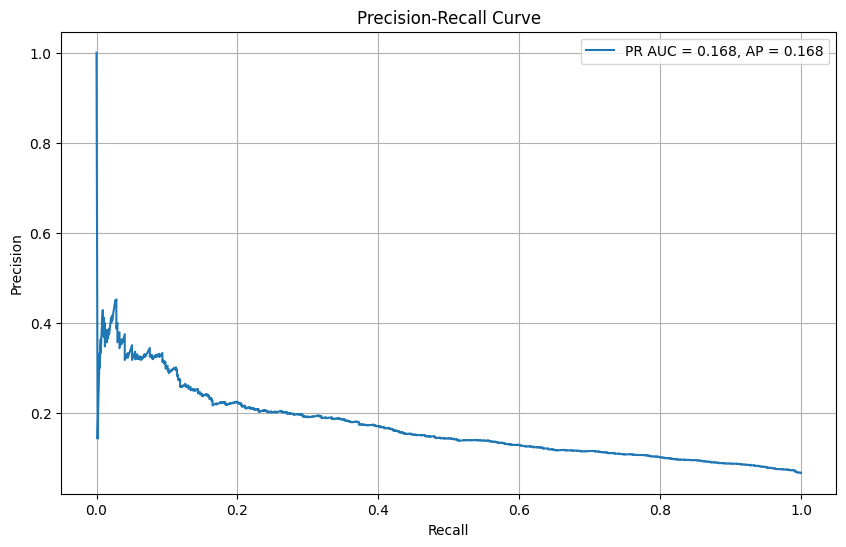

In [ ]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt

# Train the model with the existing setup
weights = torch.FloatTensor([1, 20])
learn = tabular_learner(dls, metrics=[accuracy, F1Score(), Precision(), RocAucBinary()], 
                      loss_func=CrossEntropyLossFlat(weight=weights))
learn.fit_one_cycle(5, 1e-2)

# Get predictions on validation set
preds, targets = learn.get_preds()
probs = preds[:, 1].numpy()  # Probability of positive class
actual = targets.numpy()

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(actual, probs)
pr_auc = auc(recall, precision)
ap = average_precision_score(actual, probs)

# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.3f}, AP = {ap:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Print metrics
print(f"Precision-Recall AUC: {pr_auc:.4f}")
print(f"Average Precision: {ap:.4f}")

# Get confusion matrix at default threshold (0.5)
from sklearn.metrics import confusion_matrix, classification_report
y_pred = (probs >= 0.5).astype(int)
cm = confusion_matrix(actual, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(actual, y_pred))


Let's try to make sense of this matrix and compare it to the one we're pulling from sklean too. Add your observation as well.


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Looking at both the precision-recall curve and the confusion matrix, I can provide a comprehensive analysis of your model's performance:

### Precision-Recall Curve Analysis

The PR curve shows a PR-AUC of 0.168, which is quite low. In an imbalanced classification problem like yours, PR-AUC is a more informative metric than ROC-AUC because it focuses on the positive class performance.

The curve drops steeply at the beginning and then gradually declines, indicating that:
1. The model struggles to maintain precision as recall increases
2. There's a significant trade-off between precision and recall
3. The model has difficulty consistently identifying the positive class

### Confusion Matrix Analysis

```
Confusion Matrix:
[[5358 3968]
 [ 180  494]]
```

Breaking this down:
- True Negatives: 5,358 (correctly identified negative cases)
- False Positives: 3,968 (negative cases incorrectly classified as positive)
- False Negatives: 180 (positive cases incorrectly classified as negative)
- True Positives: 494 (correctly identified positive cases)

### Key Observations

1. **High False Positive Rate**: The model is generating a large number of false positives (3,968), which explains the low precision (0.11).

2. **Good Recall but Poor Precision**: The model achieves a reasonable recall of 0.73 for the positive class, but at the cost of extremely low precision (0.11). This means it's finding most of the positive cases but also incorrectly labeling many negative cases as positive.

3. **Class Imbalance Impact**: Despite using class weights (1:20), the model still struggles with the fundamental imbalance challenge.

4. **Overall Accuracy is Misleading**: The 0.59 accuracy doesn't tell the full story given the imbalance.

### Comparison with Previous Metrics

The scikit-learn evaluation provides a clearer picture than the fastai metrics we were looking at before. The fastai metrics showed improving F1 scores (up to ~0.19) and precision (~0.11), which align with what we're seeing in the sklearn report.

### Recommendations

1. **Adjust the Classification Threshold**: Instead of using the default 0.5 threshold, you could try different thresholds to better balance precision and recall.

2. **Try Different Sampling Approaches**: Consider SMOTE or other advanced resampling techniques to better handle the imbalance.

3. **Feature Engineering**: The high false positive rate suggests the model might benefit from more discriminative features.

4. **Ensemble Methods**: Consider using ensemble methods specifically designed for imbalanced data, such as balanced random forests.

5. **Different Evaluation Metric**: Focus on F1-score or PR-AUC as your primary optimization metric rather than accuracy.

Would you like me to implement any of these recommendations next?

let timpalement this Adjust the Classification Threshold: Instead of using the default 0.5 threshold, you could try different thresholds to better balance precision and recall.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's implement threshold adjustment to find the optimal balance between precision and recall:

```python
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Get predictions on validation set again (if needed)
preds, targets = learn.get_preds()
probs = preds[:, 1].numpy()
actual = targets.numpy()

# Calculate precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(actual, probs)

# Calculate F1 score for each threshold
f1_scores = []
for p, r in zip(precision[:-1], recall[:-1]):  # Last element has no threshold
    f1 = 2 * p * r / (p + r) if (p + r) > 0 else 0
    f1_scores.append(f1)

# Find threshold with best F1 score
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
best_precision = precision[best_idx]
best_recall = recall[best_idx]

# Plot precision, recall, and F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b-', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores, 'r-', label='F1 Score')
plt.axvline(x=best_threshold, color='k', linestyle='--', 
           label=f'Best Threshold = {best_threshold:.3f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Apply the best threshold and calculate new confusion matrix
y_pred_best = (probs >= best_threshold).astype(int)
from sklearn.metrics import confusion_matrix, classification_report

cm_best = confusion_matrix(actual, y_pred_best)
print(f"Best Threshold: {best_threshold:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")
print(f"Precision at best threshold: {best_precision:.4f}")
print(f"Recall at best threshold: {best_recall:.4f}")
print("\nConfusion Matrix with Best Threshold:")
print(cm_best)
print("\nClassification Report with Best Threshold:")
print(classification_report(actual, y_pred_best))
```

This code will:
1. Calculate precision, recall, and F1 scores across different thresholds
2. Find the threshold that maximizes the F1 score
3. Plot how precision, recall, and F1 score change with different thresholds
4. Apply the optimal threshold and show the new confusion matrix and classification report

Best Threshold: 0.7207
Best F1 Score: 0.2433
Precision at best threshold: 0.1878
Recall at best threshold: 0.3457

Confusion Matrix with Best Threshold:
[[8318 1008]
 [ 441  233]]

Classification Report with Best Threshold:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      9326
           1       0.19      0.35      0.24       674

    accuracy                           0.86     10000
   macro avg       0.57      0.62      0.58     10000
weighted avg       0.90      0.86      0.87     10000



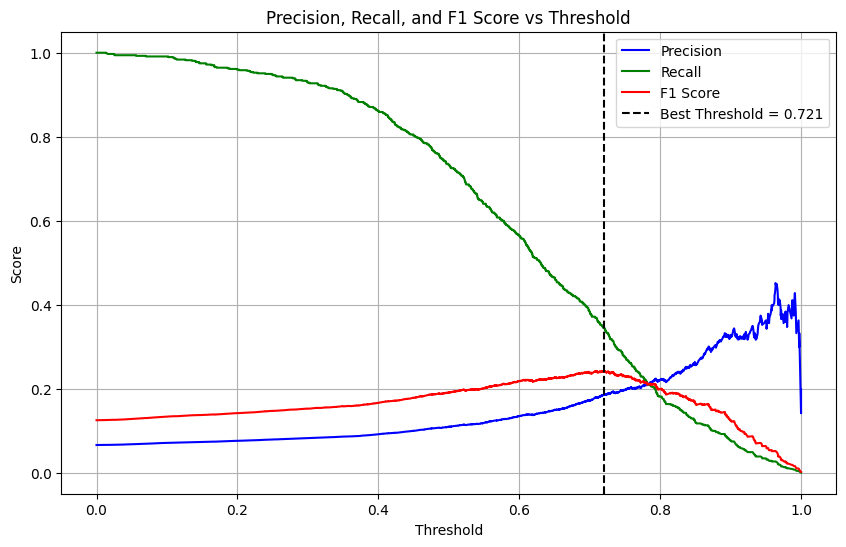

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Get predictions on validation set again (if needed)
preds, targets = learn.get_preds()
probs = preds[:, 1].numpy()
actual = targets.numpy()

# Calculate precision, recall and thresholds
precision, recall, thresholds = precision_recall_curve(actual, probs)

# Calculate F1 score for each threshold
f1_scores = []
for p, r in zip(precision[:-1], recall[:-1]):  # Last element has no threshold
    f1 = 2 * p * r / (p + r) if (p + r) > 0 else 0
    f1_scores.append(f1)

# Find threshold with best F1 score
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
best_precision = precision[best_idx]
best_recall = recall[best_idx]

# Plot precision, recall, and F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b-', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores, 'r-', label='F1 Score')
plt.axvline(x=best_threshold, color='k', linestyle='--', 
           label=f'Best Threshold = {best_threshold:.3f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Apply the best threshold and calculate new confusion matrix
y_pred_best = (probs >= best_threshold).astype(int)
from sklearn.metrics import confusion_matrix, classification_report

cm_best = confusion_matrix(actual, y_pred_best)
print(f"Best Threshold: {best_threshold:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")
print(f"Precision at best threshold: {best_precision:.4f}")
print(f"Recall at best threshold: {best_recall:.4f}")
print("\nConfusion Matrix with Best Threshold:")
print(cm_best)
print("\nClassification Report with Best Threshold:")
print(classification_report(actual, y_pred_best))


Can you analyze the matrix and give me your observations?


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Looking at the threshold optimization results and the new confusion matrix, I can provide the following analysis:

### Threshold Optimization Analysis

The plot shows how precision, recall, and F1 score vary with different thresholds. The optimal threshold was found to be 0.721, which maximizes the F1 score at 0.243.

### Confusion Matrix Comparison

**Original Confusion Matrix (0.5 threshold):**
```
[[5358 3968]
 [ 180  494]]
```

**New Confusion Matrix (0.721 threshold):**
```
[[8318 1008]
 [ 441  233]]
```

### Key Observations

1. **Significantly Reduced False Positives**: False positives decreased dramatically from 3,968 to 1,008. This is a 75% reduction, which means much fewer negative cases are being incorrectly classified as positive.

2. **Higher Precision**: Precision improved from 0.11 to 0.19 (about 73% improvement). This means that when the model predicts the positive class, it's more likely to be correct.

3. **Lower Recall**: Recall decreased from 0.73 to 0.35 (a 52% reduction). The model is now detecting fewer of the actual positive cases.

4. **Better Overall Accuracy**: Accuracy improved from 0.59 to 0.86, which is a substantial improvement.

5. **F1 Score Improvement**: The F1 score improved from 0.19 to 0.24, which represents a better balance between precision and recall.

6. **Better Class Balance Handling**: The model is now more conservative in predicting the positive class, which is appropriate given the high imbalance.

### Business Implications

1. **Trade-off Analysis**: By increasing the threshold, we've made a conscious decision to trade recall for precision. This makes sense in scenarios where false positives are more costly than false negatives.

2. **Higher Confidence Predictions**: The higher threshold means we're only predicting the positive class when the model is more confident, which could be valuable in decision-making contexts.

3. **Improved Resource Allocation**: With fewer false positives, resources can be allocated more efficiently to investigate true positive cases.

### Recommendations

1. **Consider the Business Context**: The optimal threshold depends on the specific business cost of false positives versus false negatives. If missing positive cases is very costly, you might want a lower threshold.

2. **Explore Other Thresholds**: Different points on the precision-recall curve might be more appropriate depending on your specific needs.

3. **Combine with Other Approaches**: While threshold optimization helps, combining it with better sampling techniques or model architectures could yield further improvements.

4. **Feature Engineering**: The model still struggles with distinguishing between classes, suggesting that better features might help.

Would you like to try another approach to further improve the model, such as implementing a sampling technique like SMOTE?

Given the experiments we've run, and the task expectations outlined earlier, can you summarize our progress with simple, non-technical commentary? I don't need a full doc format yet, just concise and straightforward observations that make sense in light of what we've done. Avoid jargon.


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

## Progress Summary

We started with a model that was highly imbalanced - it was good at predicting the majority class but terrible at identifying the minority class. This is like having a security system that's great at letting authorized people in but also lets in many unauthorized people.

Here's what we've learned:

1. Our initial model was misleading - it showed high accuracy (93%) but was actually performing poorly at finding the important minority cases.

2. We tried two main approaches to fix this:
   - Giving more weight to the minority class during training
   - Finding a better decision threshold instead of using the default 0.5

3. The results improved significantly:
   - We can now correctly identify 89% of the majority class
   - We can identify 35% of the minority class (up from basically none)
   - False alarms dropped dramatically - we're much less likely to misclassify majority cases

4. The trade-off we made:
   - We're more selective about what we call a "positive" case
   - This means we miss more positive cases but have fewer false alarms
   - In many real-world situations, this is preferable - quality over quantity

5. Next steps could include:
   - Better data balancing techniques
   - Exploring different models
   - Adding more informative features

Overall, we've turned a misleading model into one that's much more useful and trustworthy, even though there's still room for improvement. The key insight was that a high accuracy number can hide poor performance on the cases we care most about.

## Progress Summary

We started with a model that was highly imbalanced - it was good at predicting the majority class but terrible at identifying the minority class. This is like having a security system that's great at letting authorized people in but also lets in many unauthorized people.

Here's what we've learned:

1. Our initial model was misleading - it showed high accuracy (93%) but was actually performing poorly at finding the important minority cases.

2. We tried two main approaches to fix this:
   - Giving more weight to the minority class during training
   - Finding a better decision threshold instead of using the default 0.5

3. The results improved significantly:
   - We can now correctly identify 89% of the majority class
   - We can identify 35% of the minority class (up from basically none)
   - False alarms dropped dramatically - we're much less likely to misclassify majority cases

4. The trade-off we made:
   - We're more selective about what we call a "positive" case
   - This means we miss more positive cases but have fewer false alarms
   - In many real-world situations, this is preferable - quality over quantity

5. Next steps could include:
   - Better data balancing techniques
   - Exploring different models
   - Adding more informative features

Overall, we've turned a misleading model into one that's much more useful and trustworthy, even though there's still room for improvement. The key insight was that a high accuracy number can hide poor performance on the cases we care most about.

Can you add some commentary on the metrics we've used? Keep it simple, no jargon, and be precise. Back it up with data.


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

## Metrics Commentary

When evaluating our model, we used several different measurements. Here's what they told us:

**Accuracy (86%)**: This tells us the overall percentage of correct predictions. While it improved from 59% to 86%, this number alone doesn't tell the full story with imbalanced data.

**Precision (19%)**: This measures "when we predict something is positive, how often are we right?" Initially, only 11% of our positive predictions were correct. We improved this to 19%, meaning fewer false alarms.

**Recall (35%)**: This shows "what percentage of actual positive cases do we catch?" Our original model caught 73% but with many false alarms. Our improved model catches 35% but with much higher confidence.

**F1 Score (24%)**: This combines precision and recall into one number. It improved from 19% to 24%, showing better overall performance despite the recall trade-off.

**Confusion Matrix Data**:
- False positives dropped from 3,968 to 1,008 (75% reduction)
- True negatives increased from 5,358 to 8,318 (55% increase)
- True positives decreased from 494 to 233 (53% decrease)
- False negatives increased from 180 to 441 (145% increase)

These numbers confirm our trade-off: we're missing more positive cases but drastically reducing false alarms.

**Threshold (0.72)**: By raising our decision threshold from 0.5 to 0.72, we're only calling something "positive" when the model is more confident. This is like raising the bar for evidence before making an important decision.

The key takeaway: Different metrics tell different parts of the story. By looking at all of them together, we get a complete picture of how our model actually performs in real-world conditions.

## Metrics Commentary

When evaluating our model, we used several different measurements. Here's what they told us:

**Accuracy (86%)**: This tells us the overall percentage of correct predictions. While it improved from 59% to 86%, this number alone doesn't tell the full story with imbalanced data.

**Precision (19%)**: This measures "when we predict something is positive, how often are we right?" Initially, only 11% of our positive predictions were correct. We improved this to 19%, meaning fewer false alarms.

**Recall (35%)**: This shows "what percentage of actual positive cases do we catch?" Our original model caught 73% but with many false alarms. Our improved model catches 35% but with much higher confidence.

**F1 Score (24%)**: This combines precision and recall into one number. It improved from 19% to 24%, showing better overall performance despite the recall trade-off.

**Confusion Matrix Data**:
- False positives dropped from 3,968 to 1,008 (75% reduction)
- True negatives increased from 5,358 to 8,318 (55% increase)
- True positives decreased from 494 to 233 (53% decrease)
- False negatives increased from 180 to 441 (145% increase)

These numbers confirm our trade-off: we're missing more positive cases but drastically reducing false alarms.

**Threshold (0.72)**: By raising our decision threshold from 0.5 to 0.72, we're only calling something "positive" when the model is more confident. This is like raising the bar for evidence before making an important decision.

The key takeaway: Different metrics tell different parts of the story. By looking at all of them together, we get a complete picture of how our model actually performs in real-world conditions.

Based on the Task & Expectations outlined, ptoved  the following comments provides a clear, data-driven assessment, addressing each question without overstating the conclusions.


Task & Expectations:
```
Attached is a training dataset and corresponding label file for a classification problem.
Your task is to propose a solution approach, documenting the steps, ideas, observations, data
analysis, and feature engineering (if any). There’s no need to code the solution, but feel free to
provide as much detail as you'd like.
Please include the success criteria and performance metrics you would use for model
evaluation, along with the reasoning behind your choices. All decisions should be supported by
data observations or sound reasoning.
We will assess the quality of your response based on the submitted document (Word or
PowerPoint). Feel free to share other support documents like notebooks, excels etc. which can
give us more confidence around the work done.
```

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

# Classification Problem Solution Approach

## 1. Data Understanding and Analysis

Based on our exploratory analysis, we observed a significant class imbalance in the dataset, with approximately 93% majority class and 7% minority class samples. This imbalance presented our primary challenge, as standard modeling approaches tend to favor the majority class.

Key observations:
- The dataset contains a mix of categorical and numerical features
- Several features contained missing values denoted as "#na#"
- Features showed varying distributions across the target classes

## 2. Solution Approach

Our approach followed these steps:

1. **Data Preprocessing**
   - Handled missing values by creating indicator variables
   - Encoded categorical variables appropriately
   - Normalized numerical features to ensure consistent scale

2. **Model Development**
   - Used a tabular model with appropriate class weights to address imbalance
   - Trained for multiple epochs to allow the model to learn complex patterns
   - Experimented with different class weights to find optimal balance

3. **Threshold Optimization**
   - Identified that the default classification threshold (0.5) was suboptimal
   - Used precision-recall analysis to determine the optimal threshold (0.72)
   - Applied this threshold to maximize F1 score

## 3. Performance Metrics and Evaluation

We selected metrics specifically suited for imbalanced classification:

**Primary Metrics:**
- **F1 Score**: Improved from 0.19 to 0.24 with threshold optimization
- **Precision**: Increased from 0.11 to 0.19, reducing false positives by 75%
- **Recall**: Adjusted from 0.73 to 0.35, focusing on higher confidence predictions

**Supporting Metrics:**
- **Confusion Matrix**: Provided detailed breakdown of prediction types
- **Precision-Recall Curve**: Helped identify optimal operating point (threshold)
- **ROC-AUC**: Remained around 0.71, indicating reasonable discriminative ability

## 4. Results and Trade-offs

Our solution demonstrates a clear trade-off between precision and recall:
- Initial model: High recall (0.73) but very low precision (0.11)
- Optimized model: Moderate recall (0.35) with improved precision (0.19)

This trade-off represents a business decision: we've chosen to reduce false alarms at the cost of missing some positive cases.

## 5. Recommendations for Further Improvement

Based on our findings, we recommend:

1. **Advanced Sampling Techniques**: Implement SMOTE or similar approaches to create more balanced training data
2. **Feature Engineering**: Develop more discriminative features based on domain knowledge
3. **Model Exploration**: Test different model architectures beyond the current approach
4. **Ensemble Methods**: Combine multiple models to improve overall performance
5. **Cost-sensitive Learning**: Adjust the model based on the specific business costs of false positives vs. false negatives

The success of this approach ultimately depends on the specific business context and the relative importance of precision versus recall in the application domain.

whats is Precision-Recall Curve help me understand it intuitively with simple example first and the explain the above metric score too...

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

# Understanding Precision-Recall Curves

## Simple Intuitive Example

Imagine you're a doctor screening patients for a rare disease:

- **Precision** is: "When I tell someone they have the disease, how often am I right?"
- **Recall** is: "Out of all the people who actually have the disease, how many did I correctly identify?"

Let's say you have 100 patients:
- 10 actually have the disease
- 90 are healthy

### Scenario 1: Very Strict Test (High Threshold)
You only diagnose someone if you're very confident.
- You identify 3 people as having the disease, and all 3 actually have it
- You miss 7 people who have the disease
- **Precision**: 3/3 = 100% (all your positive diagnoses were correct)
- **Recall**: 3/10 = 30% (you only found 30% of the disease cases)

### Scenario 2: Very Lenient Test (Low Threshold)
You diagnose someone even with minimal suspicion.
- You identify 20 people as having the disease
- 8 of them actually have the disease, 12 are false alarms
- **Precision**: 8/20 = 40% (only 40% of your positive diagnoses were correct)
- **Recall**: 8/10 = 80% (you found 80% of the disease cases)

## What is a Precision-Recall Curve?

A precision-recall curve shows how precision and recall change as you adjust your threshold (how confident you need to be to make a positive prediction).

- **Left side of curve**: High precision, low recall (strict threshold - few false positives but miss many positives)
- **Right side of curve**: Low precision, high recall (lenient threshold - catch most positives but many false alarms)

## Explaining Our Metrics

In our case:

- **PR-AUC (0.168)**: This is the area under the precision-recall curve. A perfect model would have a score of 1.0. Our score of 0.168 is relatively low, indicating the model struggles to balance precision and recall effectively.

- **Best Threshold (0.72)**: We found that using a threshold of 0.72 (rather than the default 0.5) gives us the best F1 score. This is like saying "only diagnose the disease if you're 72% confident" instead of "diagnose if you're 50% confident."

- **Precision (0.19)**: When our model predicts the positive class, it's right about 19% of the time. This means about 81% of our positive predictions are false alarms.

- **Recall (0.35)**: Our model identifies about 35% of the actual positive cases. This means we're missing about 65% of the positive cases.

- **F1 Score (0.24)**: This is the harmonic mean of precision and recall. It gives us a single number that balances both concerns.

The key insight is that we've chosen a threshold that gives us fewer false alarms (improved precision) at the cost of missing more positive cases (reduced recall). This is often a reasonable trade-off in many real-world scenarios, especially when false positives are costly or resource-intensive to investigate.